<a href="https://colab.research.google.com/github/RosalesLuis123/IA/blob/main/Parcial2/Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rosales Palma Luis Ignacio,35-5256

# Se hace uso del metodo k-Means en un dataset de regresion Lineal, el data set es: **Gemstone Price Prediction** ,el numero 103.

# **Conectar Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importar librerias**

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# **Leer Dataset**

In [ ]:
file_path = '/content/drive/My Drive/Parcial2/cubic_zirconia.csv'
data = pd.read_csv(file_path)

In [ ]:
# Eliminar solo la primera columna
data = data.iloc[:, 1:]

Funcion para convertir columnas de clase que estan en formato texto a numeros e Float64 de manera automatica

In [ ]:
def convertir_columna_a_int(data, columna):
    # Obtener las categorías únicas en la columna
    categorias_unicas = data[columna].unique()

    # Crear un diccionario para mapear las categorías únicas a valores numéricos
    columna_map = {categoria: idx for idx, categoria in enumerate(categorias_unicas)}

    # Aplicar el mapeo a la columna
    data[columna] = data[columna].map(columna_map)

    # Convertir la columna a tipo int64
    data[columna] = data[columna].astype('float64')

    return data

# Aplicar la función a las columnas especificadas
columnas_a_convertir = ['cut', 'color', 'clarity']
for columna in columnas_a_convertir:
    data = convertir_columna_a_int(data, columna)


evitamos no tener valores vacios o nulos

In [ ]:
# Reemplazar los valores nulos o vacíos con cero en todo el DataFrame
data.fillna(0, inplace=True)

# Verificar que ya no haya valores nulos o vacíos en el DataFrame
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


Informacion del dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  float64
 2   color    26967 non-null  float64
 3   clarity  26967 non-null  float64
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.1 MB


Normalizamos

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# **Determinar el número óptimo de clusters**

In [ ]:
inertia = []
silhouette_scores = []
max_clusters = 10  # Máximo número de clusters a probar
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# **Metodo del Codo**

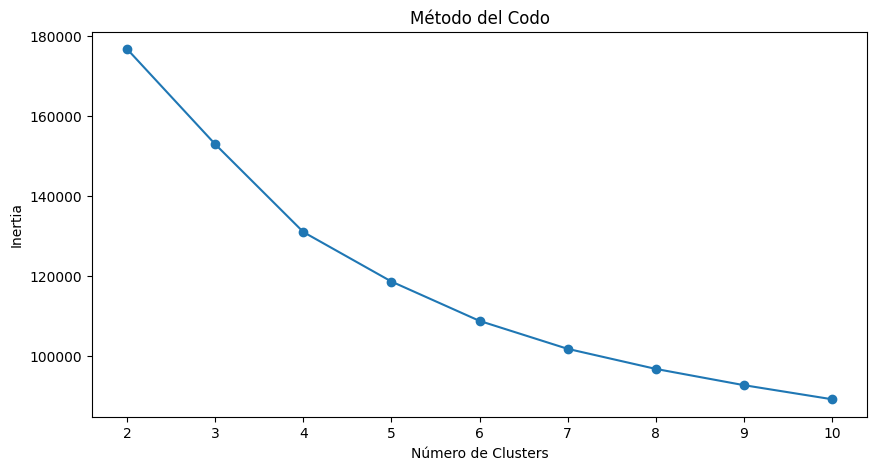

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()

# **Metodo de la Silueta**

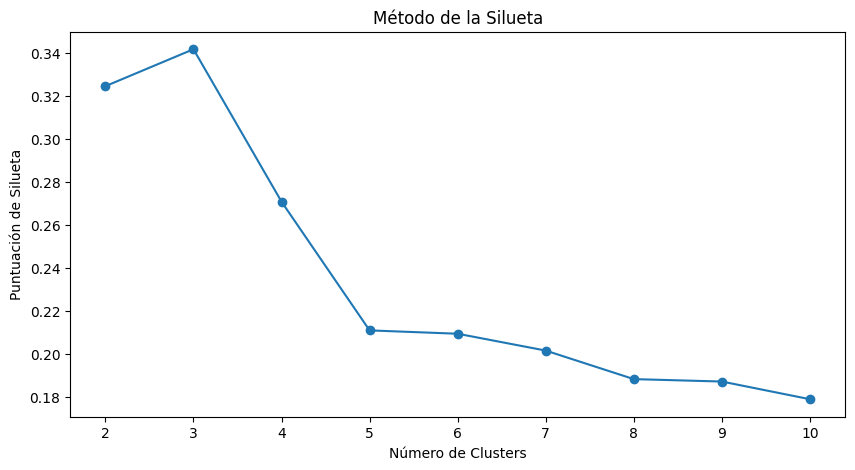

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()

Como se puede apreciar el numero optimo de clusters llega a ser 3 por lo tanto se lo usa ya que es la mejor opcion

# **Entrenamos el Modelo**

In [ ]:
best_k = 3  # Elegir el número óptimo de clusters según el método del codo o de la silueta
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# **Evaluar la cohesión y la separación de los clusters**

In [ ]:
intra_cluster_distances = []
for i in range(best_k):
    cluster_data = scaled_data[kmeans.labels_ == i]
    centroid = kmeans.cluster_centers_[i]
    distances = [sum((point - centroid) ** 2) for point in cluster_data]
    intra_cluster_distances.append(sum(distances) / len(distances))

# Calcular la separación inter-cluster (distancia entre los centroides de los clusters)
inter_cluster_distances = []
for i in range(best_k):
    for j in range(i + 1, best_k):
        distance = sum((kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j]) ** 2)
        inter_cluster_distances.append(distance)

# Mostrar las medidas de evaluación
print("\nMedidas de Evaluación:")
print("Cohesión Intra-Cluster (menor es mejor):", sum(intra_cluster_distances))
print("Separación Inter-Cluster (mayor es mejor):", sum(inter_cluster_distances))


Medidas de Evaluación:
Cohesión Intra-Cluster (menor es mejor): 20.98580663775664
Separación Inter-Cluster (mayor es mejor): 99.34735293418021


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


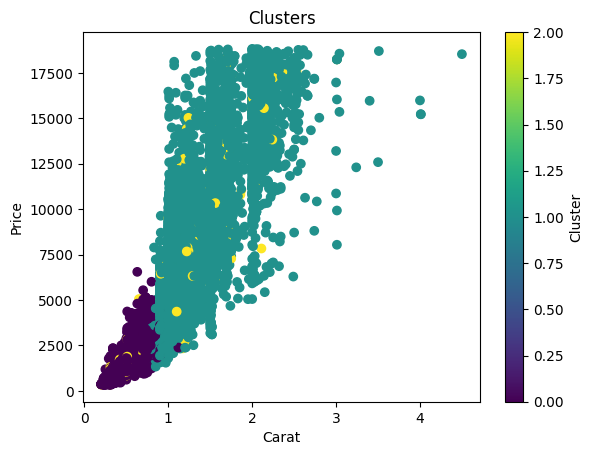

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elegir el número óptimo de clusters según el método del codo o de la silueta
best_k = 3

# Ajustar el modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_data)

# Asignar clusters a los datos
cluster_labels = kmeans.labels_

# Graficar los clusters en el espacio de características original
plt.scatter(data['carat'], data['price'], c=cluster_labels, cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()
